In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [6]:
# Load the dataset (link: https://www.kaggle.com/datasets/hemachandiranmurugan/house-price-india-dataset)
df = pd.read_csv("House Price India.csv")
target_variable = "Price"

In [7]:
# Initial Data Inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Shape: (14620, 23)

First 5 rows of the dataset:
           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovatio

In [8]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  

In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 id          Date  number of bedrooms  number of bathrooms  \
count  1.462000e+04  14620.000000        14620.000000         14620.000000   
mean   6.762821e+09  42604.538646            3.379343             2.129583   
std    6.237575e+03     67.347991            0.938719             0.769934   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14620.000000  1.462000e+04      14620.000000        14620.000000   
mean    2098.262996  1.509328e+04          1.502360            0.007661   
std      928.275721  3.791962e+04          0.540239

In [10]:
# Step 1: Data Cleaning
# Drop duplicates
print("\nNo. of records before removing duplicates:", df.shape[0])
df.drop_duplicates(keep='first', inplace=True)
print("No. of records after removing duplicates:", df.shape[0])


No. of records before removing duplicates: 14620
No. of records after removing duplicates: 14620


In [11]:
# Drop irrelevant columns
df.drop(['id', 'Date', 'Postal Code'], axis=1, inplace=True)

In [12]:
# Handle missing values if any
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64


In [13]:
# Outlier Detection and Removal for 'Price' (using IQR method)
def outlier_treatment(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return lower, upper

In [14]:
l, u = outlier_treatment(df['Price'])
print("Before dropping outliers:", df.shape)
df = df[(df['Price'] >= l) & (df['Price'] <= u)]
print("After dropping outliers:", df.shape)

Before dropping outliers: (14620, 20)
After dropping outliers: (13859, 20)


In [15]:
# Normalizing continuous features using MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
# Step 2: Exploratory Data Analysis (EDA)
# Check skewness and kurtosis
print("\nSkewness of each feature:")
print(df.skew(numeric_only=True))
print("\nKurtosis of each feature:")
print(df.kurtosis(numeric_only=True))


Skewness of each feature:
number of bedrooms                        2.878261
number of bathrooms                       0.230014
living area                               0.826748
lot area                                 10.438447
number of floors                          0.650392
waterfront present                       17.465597
number of views                           3.950750
condition of the house                    1.010377
grade of the house                        0.527040
Area of the house(excluding basement)     1.086254
Area of the basement                      1.412207
Built Year                               -0.460430
Renovation Year                           4.664317
Lattitude                                -0.472852
Longitude                                 0.871893
living_area_renov                         0.928069
lot_area_renov                            7.908325
Number of schools nearby                 -0.020687
Distance from the airport                 0.006526
Pric

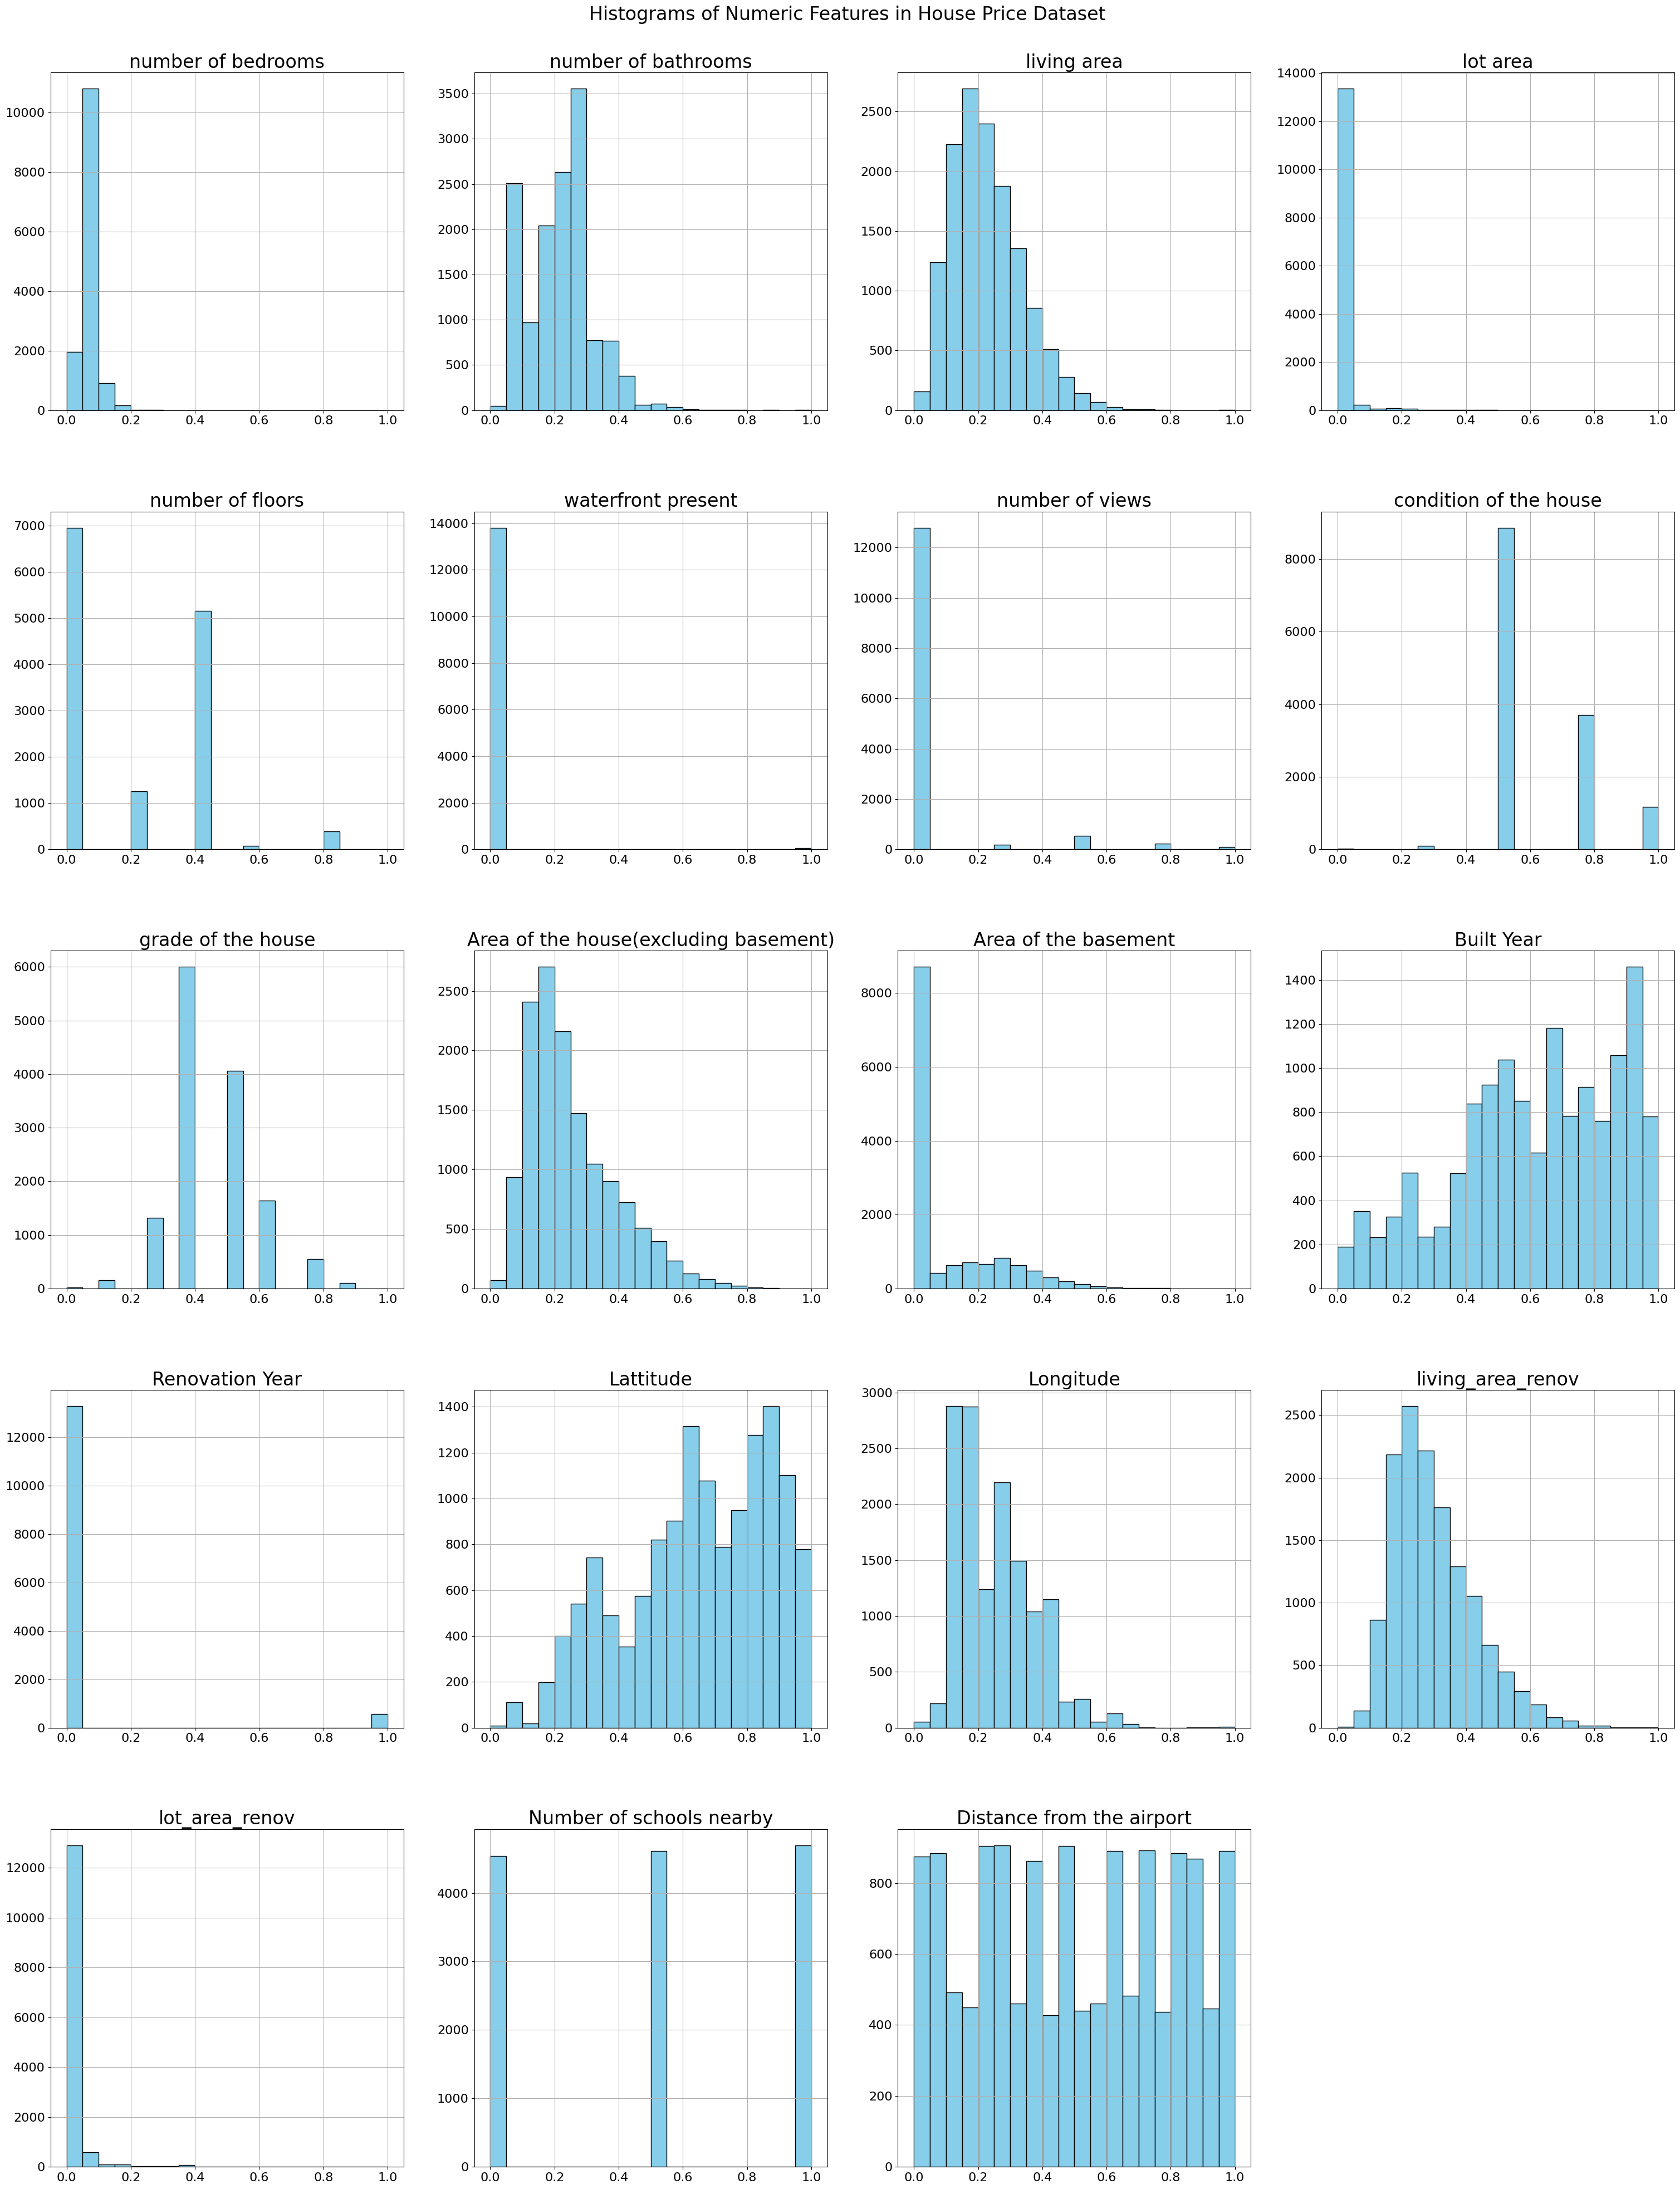

In [17]:
# Histograms
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['id', 'Date', target_variable], errors='ignore')
ax = df[numeric_columns].hist(figsize=(30, 40), bins=20, edgecolor='black', color='skyblue', layout=(len(numeric_columns) // 4 + 1, 4))
plt.suptitle('Histograms of Numeric Features in House Price Dataset', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust this rect value to control margins
plt.subplots_adjust(top=0.95, hspace = 0.3, wspace = 0.2)  # Move the title closer to the plots

for axes in ax.flatten():
    axes.set_title(axes.get_title(), fontsize=24)  # Title font size
    axes.set_xlabel(axes.get_xlabel(), fontsize=14)  # X-axis label font size
    axes.set_ylabel(axes.get_ylabel(), fontsize=14)  # Y-axis label font size
    # Set tick label font size
    for tick in axes.get_xticklabels() + axes.get_yticklabels():
        tick.set_fontsize(16)

plt.show()

In [18]:
# Calculate the correlation matrix
corr_matrix = df[numeric_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
                                       number of bedrooms  \
number of bedrooms                               1.000000   
number of bathrooms                              0.486262   
living area                                      0.576949   
lot area                                         0.024942   
number of floors                                 0.154136   
waterfront present                              -0.029203   
number of views                                  0.036795   
condition of the house                           0.023747   
grade of the house                               0.318161   
Area of the house(excluding basement)            0.456220   
Area of the basement                             0.279976   
Built Year                                       0.159953   
Renovation Year                                 -0.001178   
Lattitude                                       -0.030734   
Longitude                                        0.143677   
livi

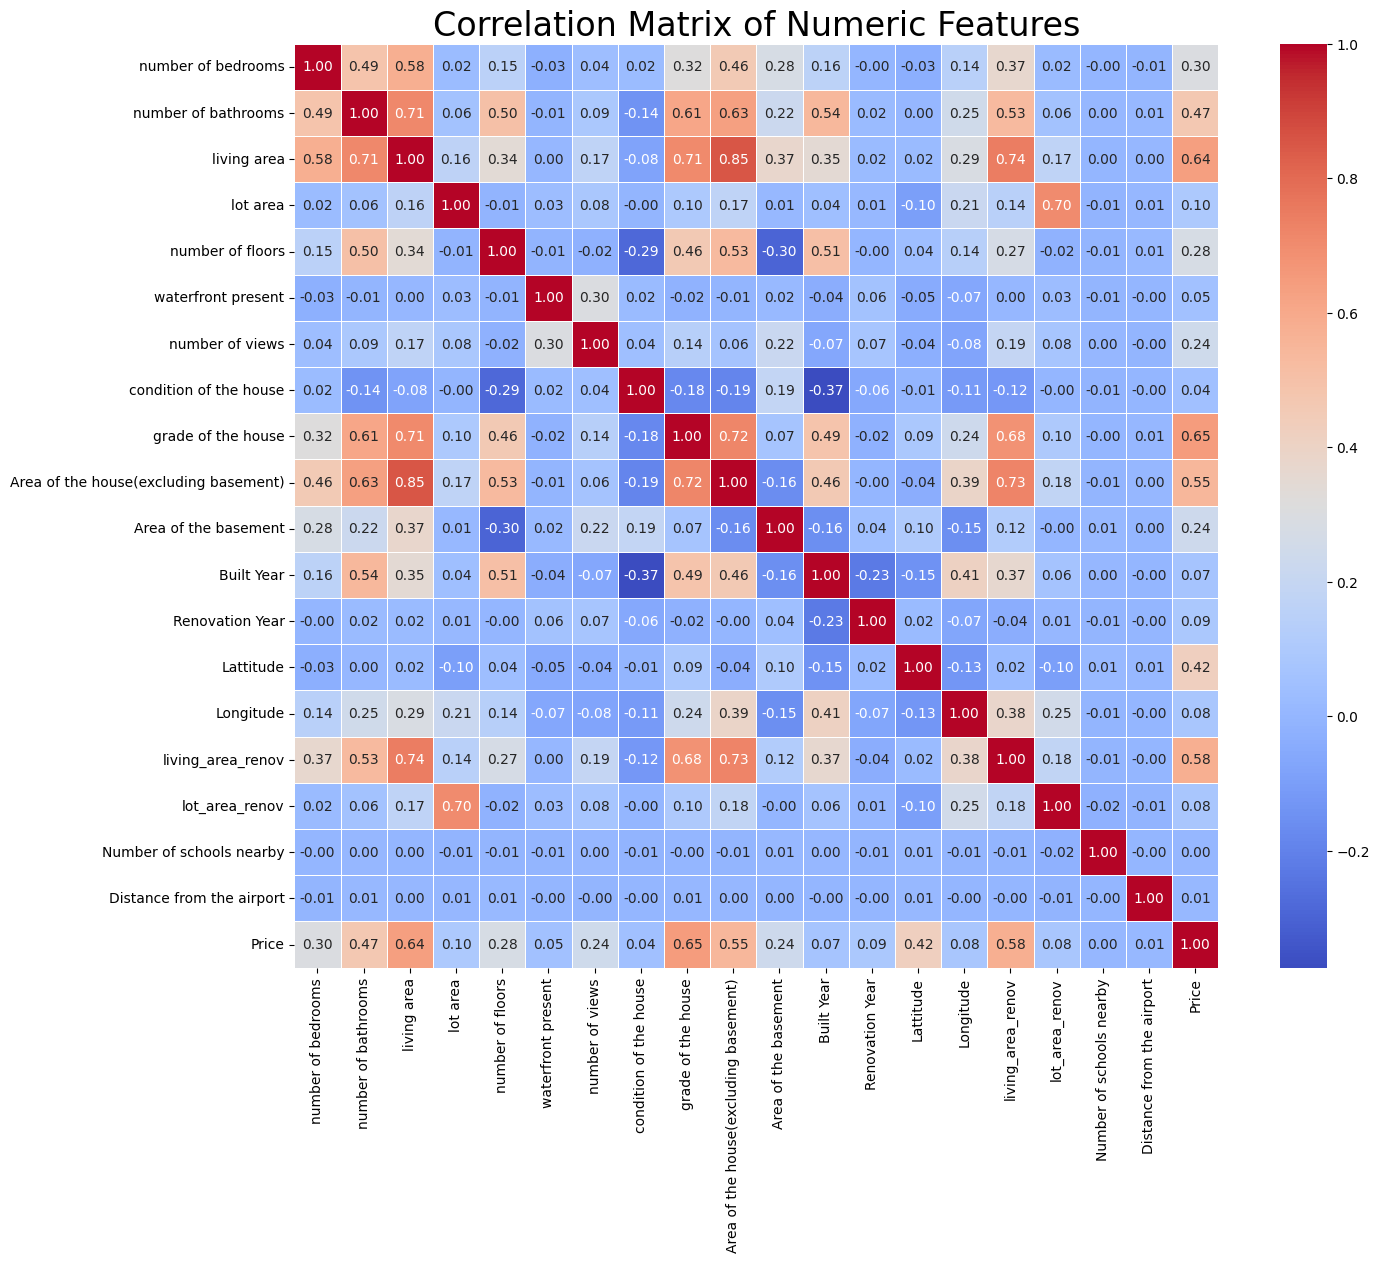

In [19]:
# Plot Correlation Matrix
plt.figure(figsize=(16, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=24)
plt.show()

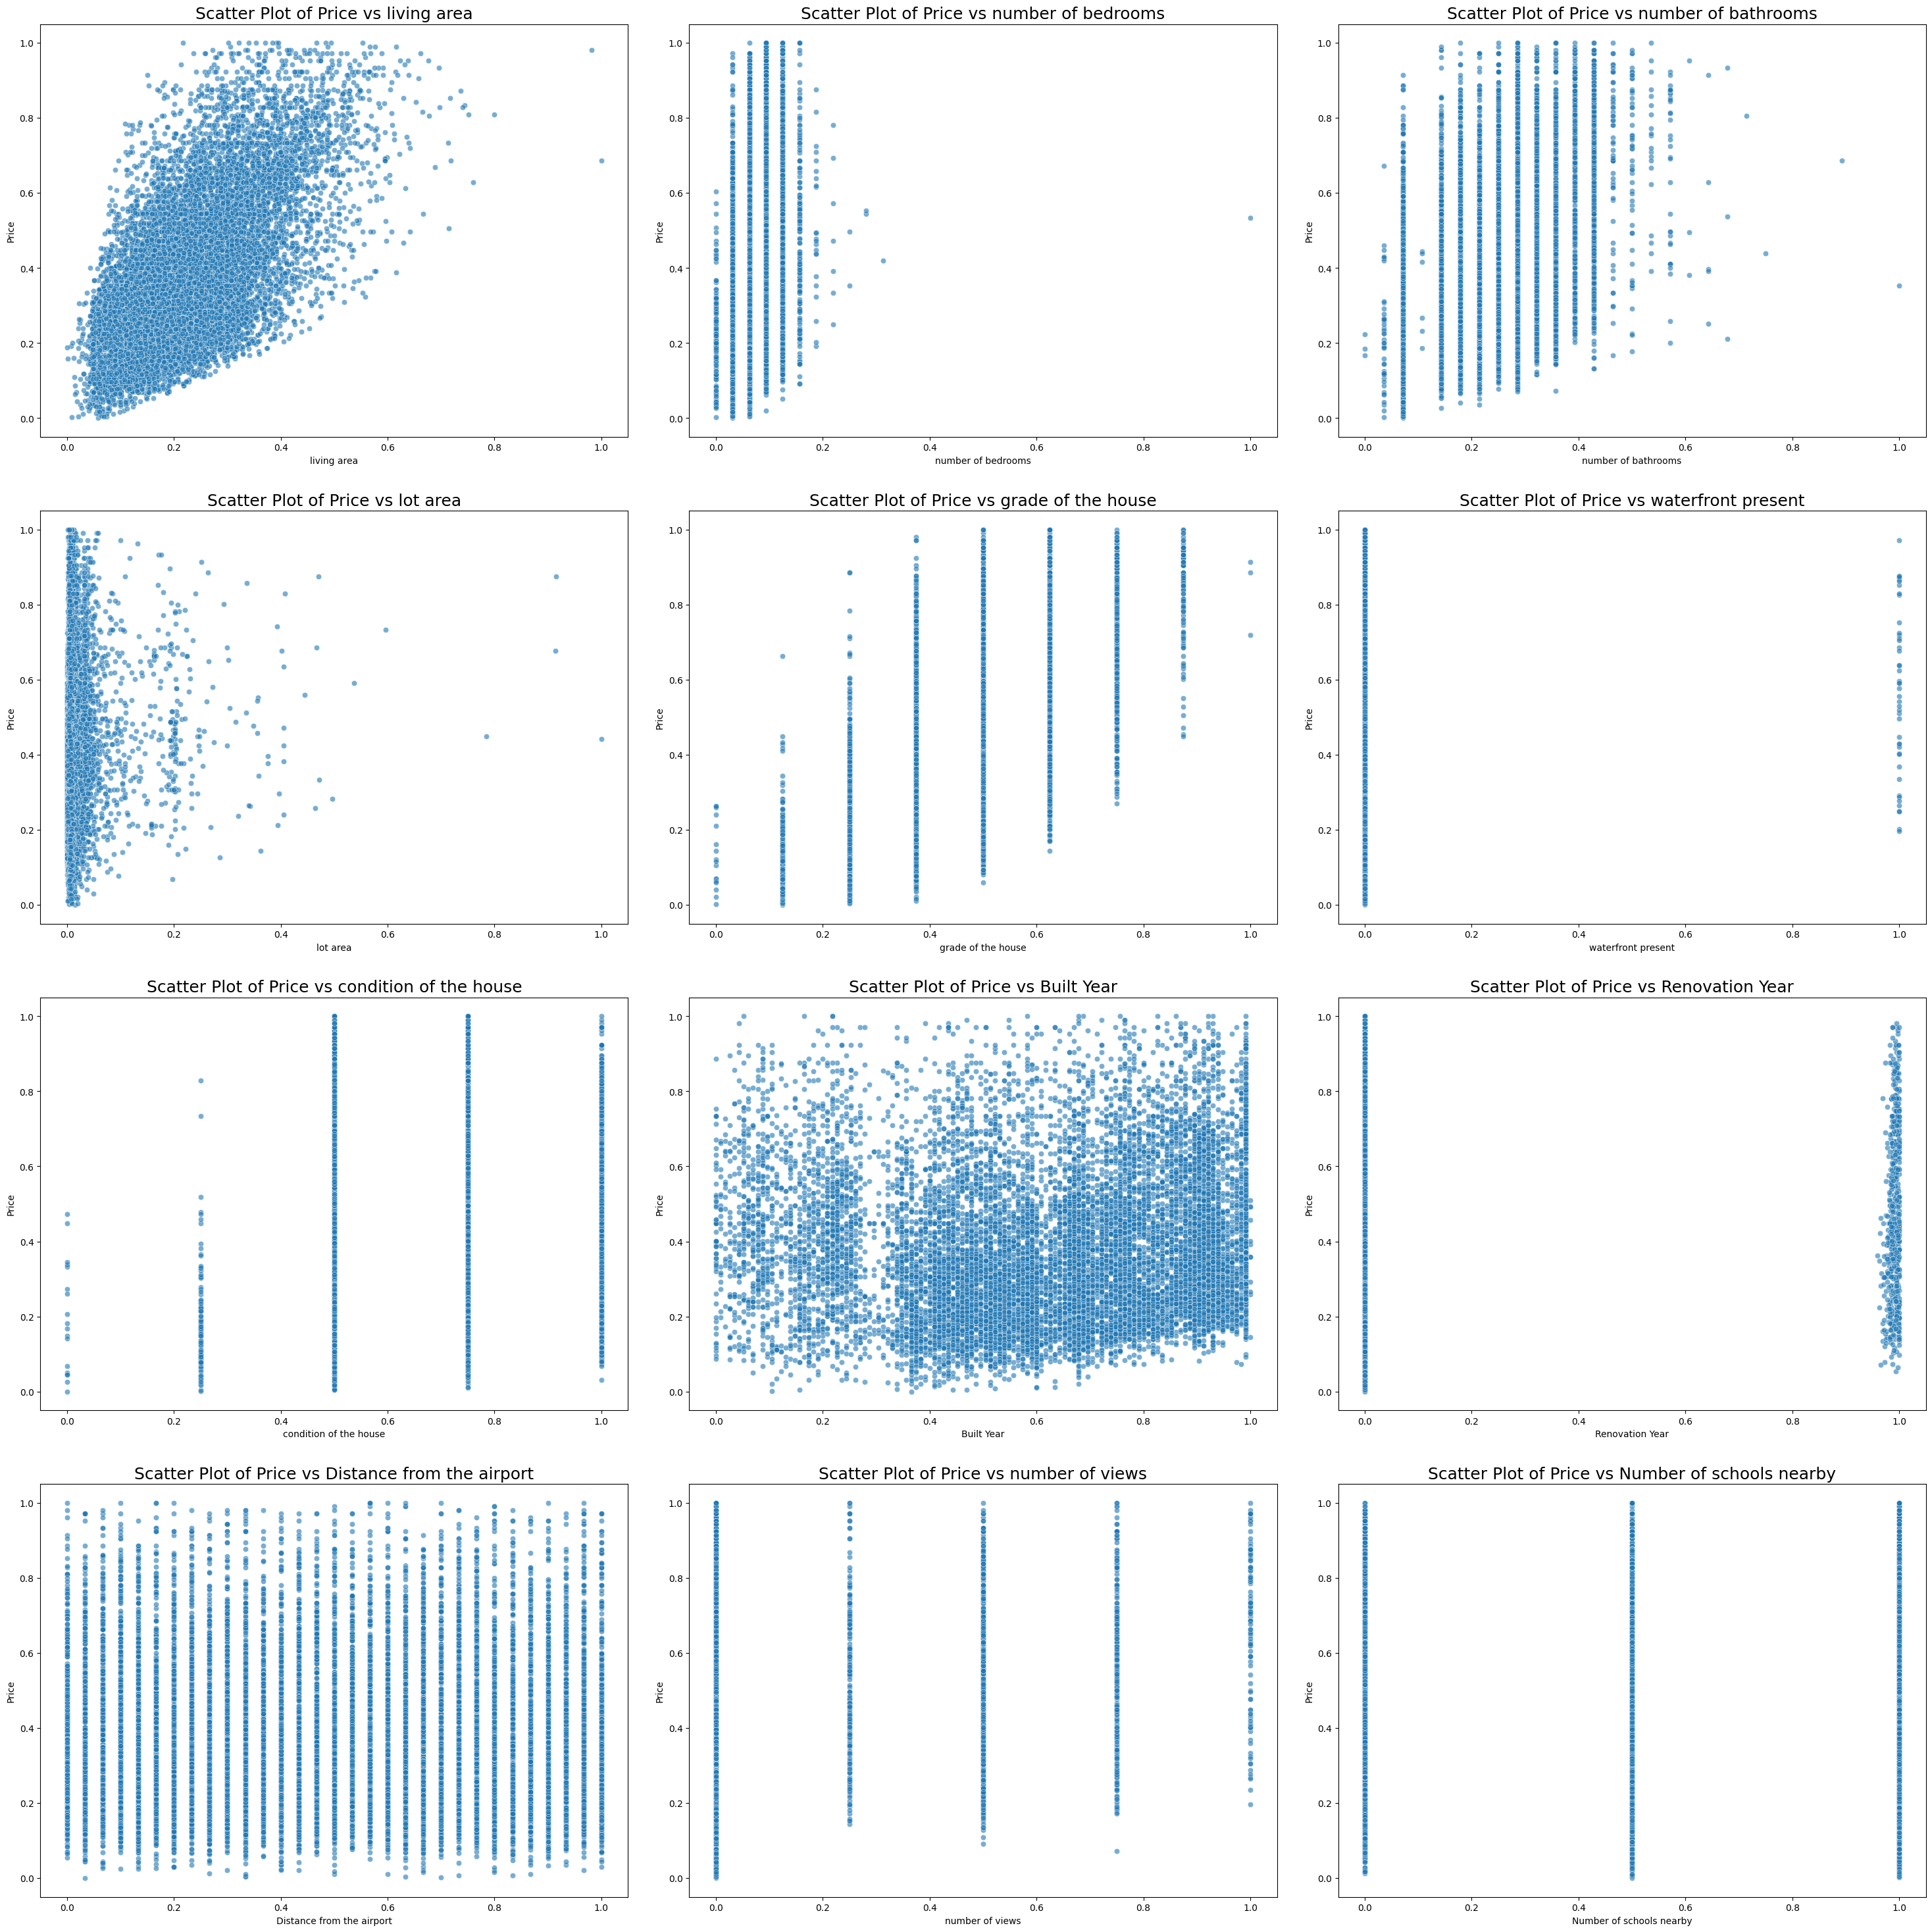

In [20]:
# Scatter Plots for selected features against Price
important_features = [
    'living area', 'number of bedrooms', 'number of bathrooms', 'lot area', 
    'grade of the house', 'waterfront present', 'condition of the house', 
    'Built Year', 'Renovation Year', 'Distance from the airport', 'number of views', 
    'Number of schools nearby'
]

plt.figure(figsize=(30, 30))
for i, feature in enumerate(important_features, start=1):
    ax = plt.subplot(4, 3, i)
    sns.scatterplot(data=df, x=feature, y=target_variable, alpha=0.6, ax=ax)
    ax.set_title(f'Scatter Plot of Price vs {feature}', fontsize=18)
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
plt.tight_layout(pad=3.0)
plt.show()


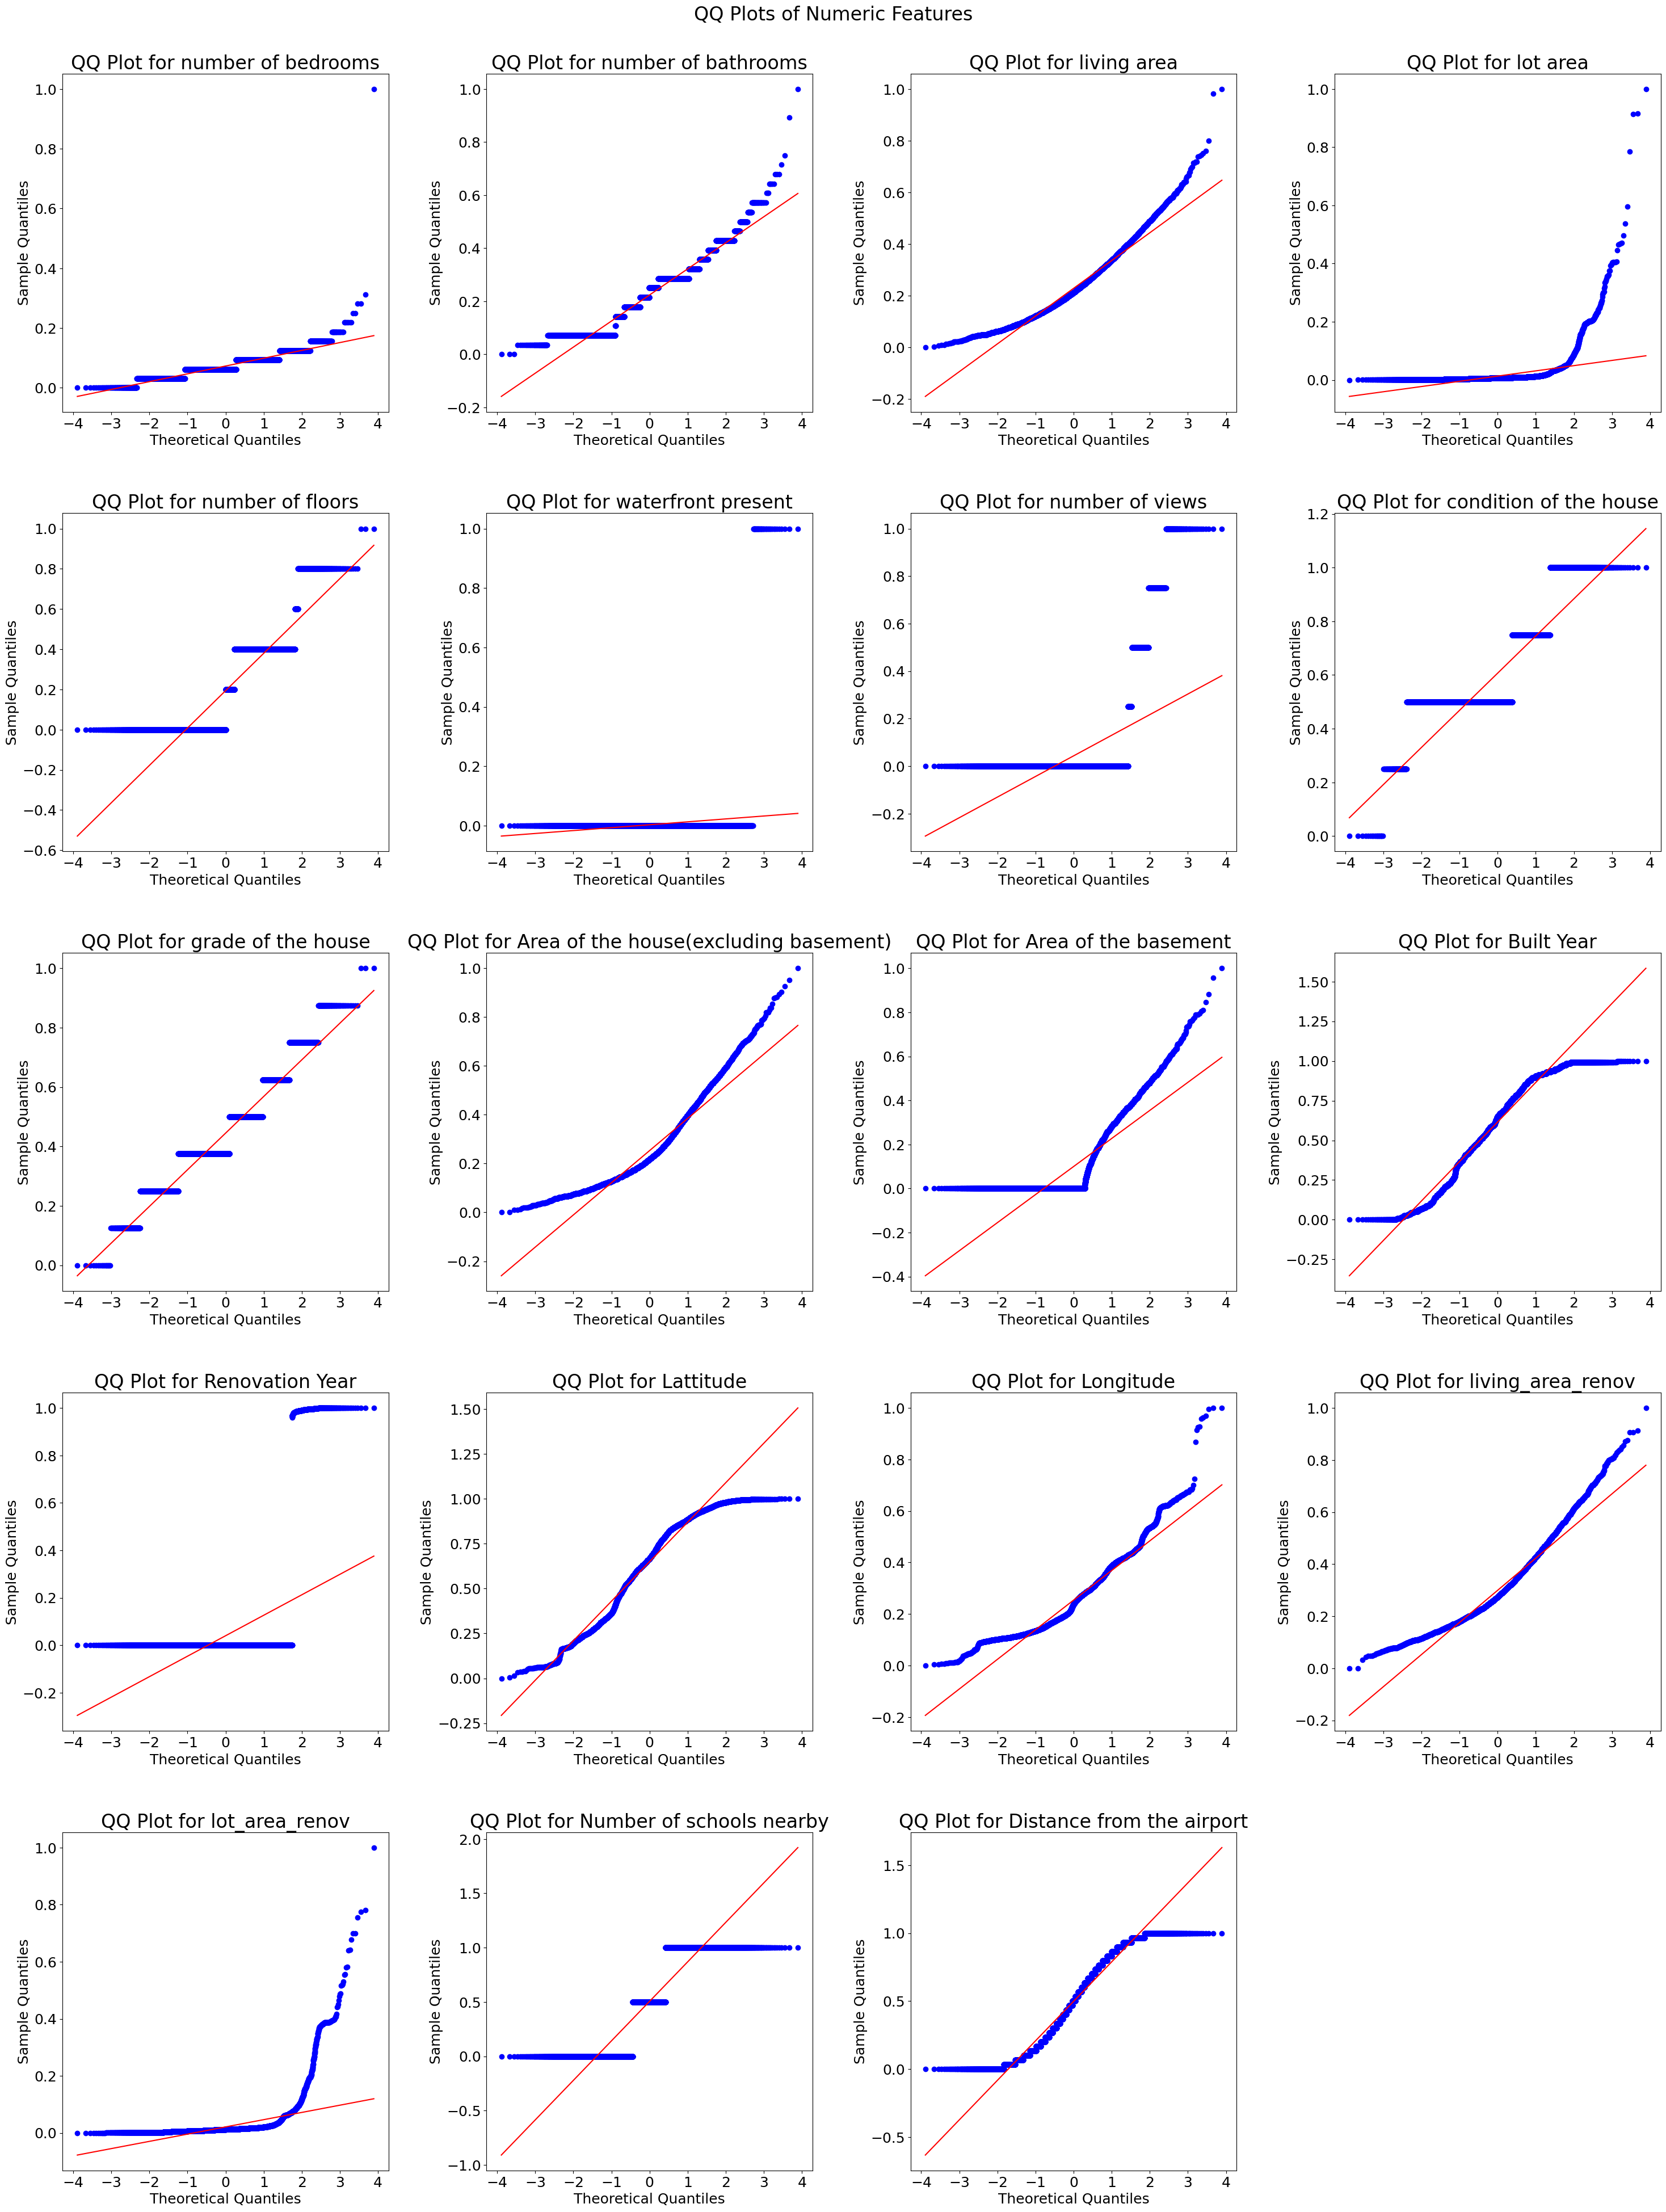

In [21]:
# Set up the figure
plt.figure(figsize=(30, 40))
plot_color = "skyblue"

# Create QQ plots for each numeric feature
for i, feature in enumerate(numeric_columns):
    ax = plt.subplot(len(numeric_columns) // 4 + 1, 4, i + 1, )  # Adjust subplot layout
    stats.probplot(df[feature], dist="norm", plot=plt)
    ax.set_title(f'QQ Plot for {feature}', fontsize=24)
    ax.set_xlabel('Theoretical Quantiles', fontsize=18)  # X-axis label font size
    ax.set_ylabel('Sample Quantiles', fontsize=18)  # Y-axis label font size
    ax.get_lines()[1].set_color("red")  # Set the color of the QQ line
    ax.get_lines()[0].set_markerfacecolor("blue")  # Set the color of the data points

    # Set tick label font size
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(18)
    
# Adjust layout
plt.tight_layout(pad=3.0)  # Adjust padding between subplots
plt.subplots_adjust(top=0.95, hspace=0.3, wspace=0.3)  # Increase vertical and horizontal space
plt.suptitle('QQ Plots of Numeric Features', fontsize=24)
plt.show()


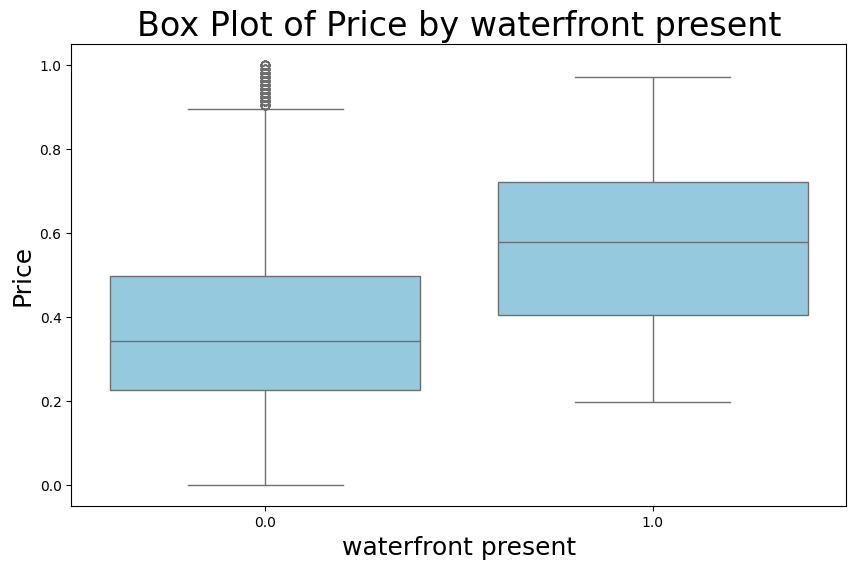

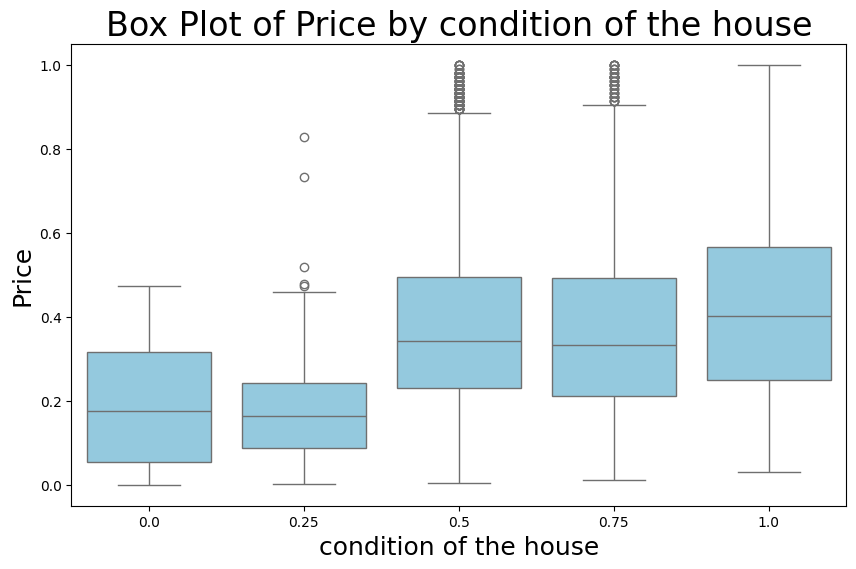

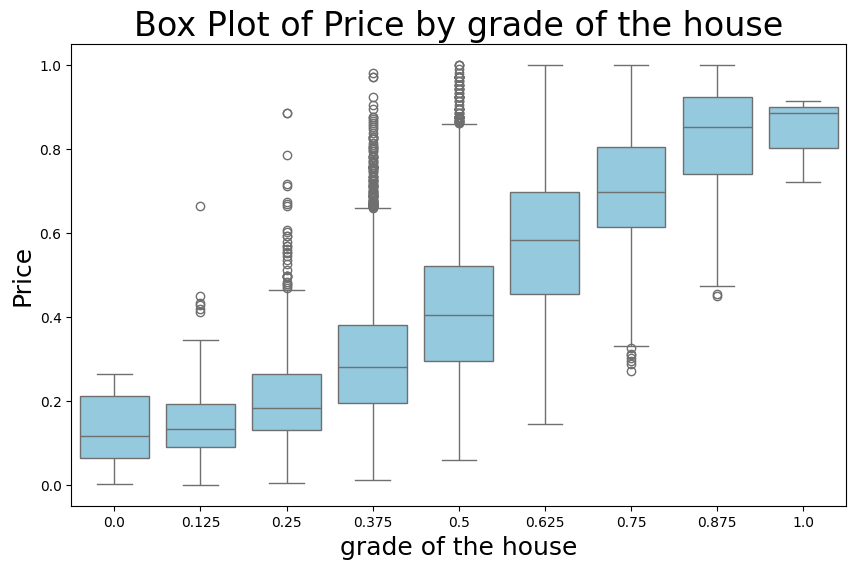

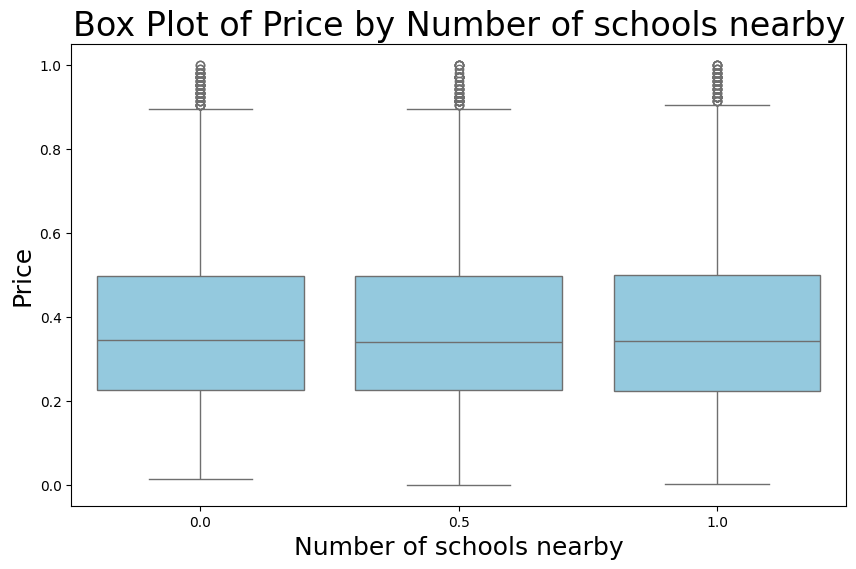

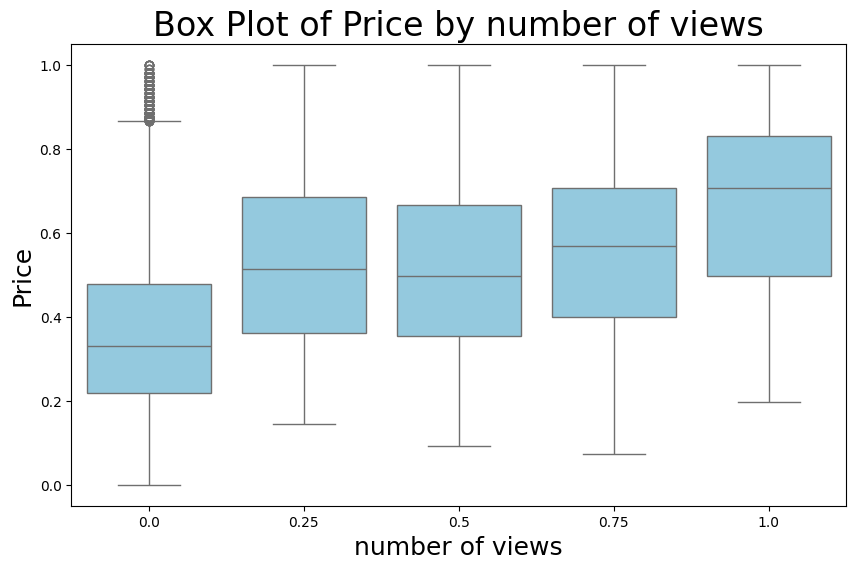

In [22]:
# Categorical features
categorical_features = ['waterfront present', 'condition of the house', 'grade of the house', 'Number of schools nearby', 'number of views']

for feature in categorical_features:
    # Create a box plot for a categorical feature
    plt.figure(figsize=(10, 6))
    
    # Create the box plot
    sns.boxplot(data=df, x=feature, y='Price', color="skyblue")  # Ensure 'Price' matches your DataFrame's column name
    
    # Set the title and labels
    plt.title(f'Box Plot of Price by {feature}', fontsize=24)
    plt.xlabel(feature, fontsize=18)
    plt.ylabel('Price', fontsize=18)
    
    # Show the plot
    plt.show()


In [23]:
# Step 3: Linear Regression Model Building
# Define features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print("\nX_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (9701, 19) y_train shape: (9701,)
X_test shape: (4158, 19) y_test shape: (4158,)


In [25]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict on test data
y_pred = model.predict(X_test)

In [27]:
# Step 4: Model Evaluation
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.012
Mean Absolute Error (MAE): 0.082
R-squared (R2): 0.710


C:\Users\Admin\AppData\Local\Temp\ipykernel_10292\2144516655.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


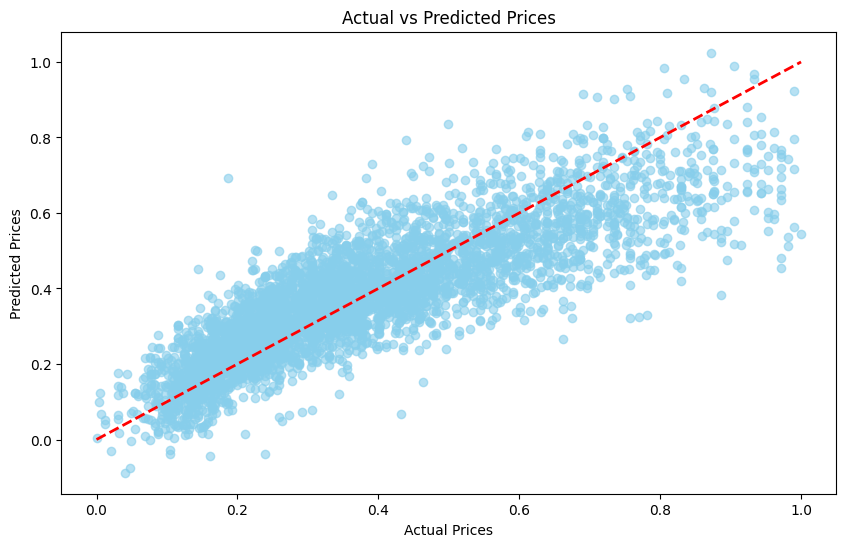

In [29]:
# Plot Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

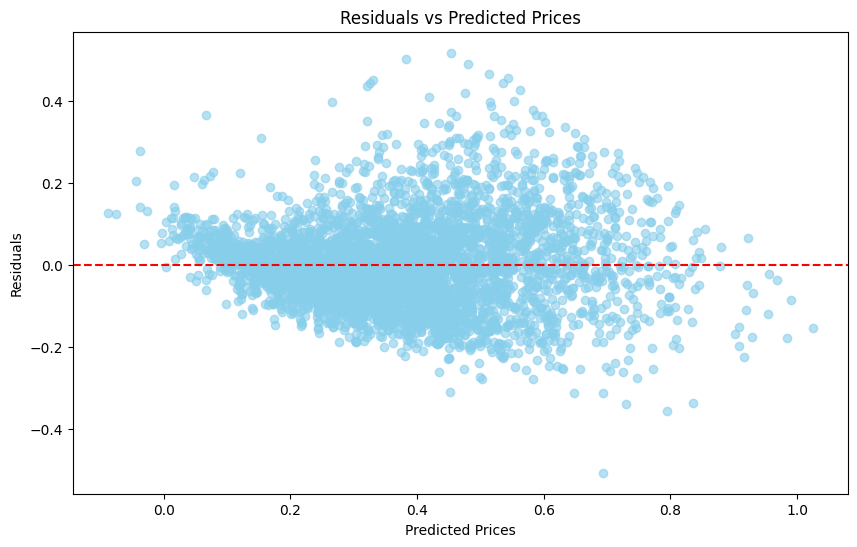

In [30]:
# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="skyblue")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

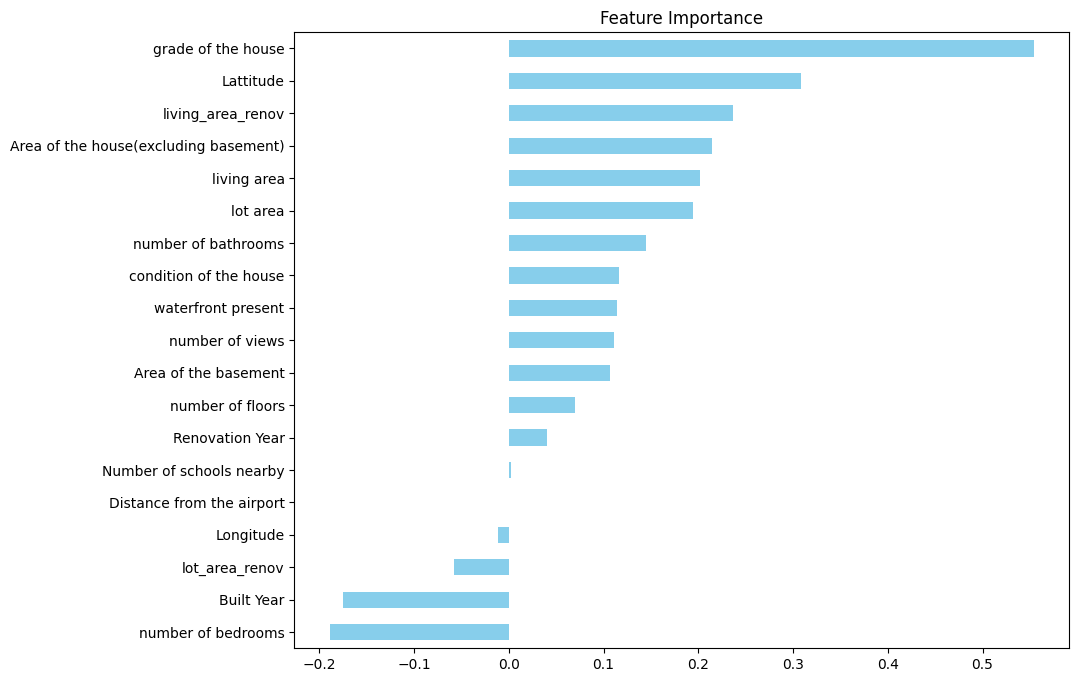

In [31]:
# Feature Importance (Coefficient values in linear regression)
feature_importance = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(10, 8))
feature_importance.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.show()